In [1]:
import numpy as np
import cv2
import os
from matplotlib import pyplot as plt
from scipy import signal

In [2]:
PATH = './lucas_kanade/'
PATH_TO_FRAMES = './lucas_kanade/Football/img/'

In [3]:
frames = sorted(os.listdir(PATH_TO_FRAMES))

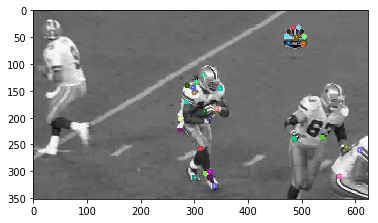

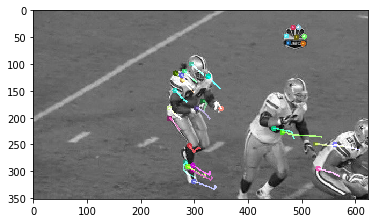

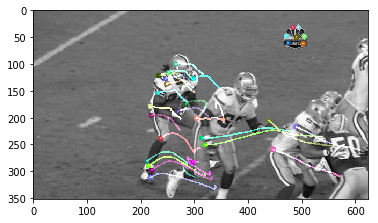

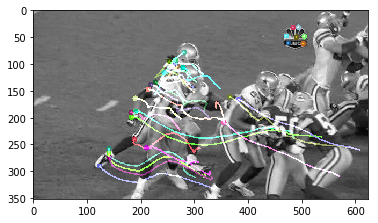

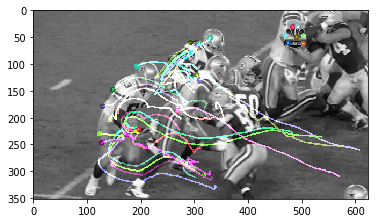

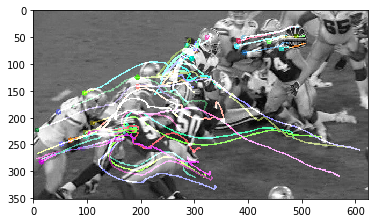

In [4]:
# params for ShiTomasi corner detection
feature_params = dict( maxCorners = 30,
                       qualityLevel = 0.3,
                       minDistance = 9,
                       blockSize = 9 )

# Parameters for lucas kanade optical flow
lk_params = dict( winSize  = (15,15),
                  maxLevel = 8,       # this parameter corresponds to the max number of piramids 
                 # method LK will use as many levels as pyramids have but no more than maxLevel
                  criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.3)
                )

# Create some random colors
color = np.random.randint(0,255,(100,3))

# Take first frame and find corners in it
old_frame = cv2.imread(PATH_TO_FRAMES + frames[0])

old_gray = cv2.cvtColor(old_frame, cv2.COLOR_BGR2GRAY)
p0 = cv2.goodFeaturesToTrack(old_gray, mask = None, **feature_params)

# Create a mask image for drawing purposes
mask = np.zeros_like(old_frame)

# create video writer
ft="XVID"
fourcc = cv2.VideoWriter_fourcc(*'MP4V')
height , width , layers =  old_frame.shape
video = cv2.VideoWriter(PATH + 'piramid_extention_football' + '.mp4', fourcc, 24., (width,height))

# here I take only first 100 frames to make video clearer
N = 100
for k in range(N):

    frame = cv2.imread(PATH_TO_FRAMES + frames[k])
    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)    

    # calculate optical flow
    p1, st, err = cv2.calcOpticalFlowPyrLK(old_gray, frame_gray, p0, None, **lk_params)
    

    # Select good points
    good_new = p1[st==1]
    good_old = p0[st==1]

    # draw the tracks
    for i,(new,old) in enumerate(zip(good_new,good_old)):
        a,b = new.ravel()
        c,d = old.ravel()
        mask = cv2.line(mask, (a,b),(c,d), color[i].tolist(), 2)
        frame = cv2.circle(frame,(a,b),5,color[i].tolist(),-1)
    img = cv2.add(frame,mask)
    
    # display each 20th image
    if (k) % 20 == 0 or k==N-1:
        plt.figure()
        plt.imshow(img)
        plt.show()
    
    video.write(img)

    # Now update the previous frame and previous points
    old_gray = frame_gray.copy()
    p0 = good_new.reshape(-1,1,2)
    

# save video
cv2.destroyAllWindows()
video.release()

A video result is here `./lucas_kanade/piramid_extention_football.mp4`

I didn't notice huge difference between LK method and LK with piramid image preprecessing. The optical flow line of descriptors look more smoothed on the result with piramid extention. But I noticed on the last frame that static object in top right area is shown as it's moving in the result with piramid extension which is an error.

I've added the last frames of both methods below.

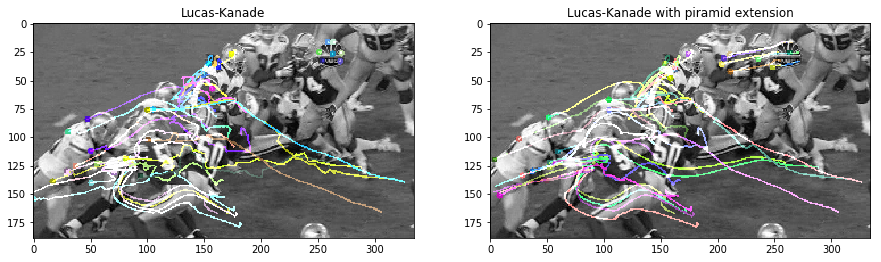

In [29]:
fig, axes = plt.subplots(1, 2)

fig.set_size_inches(15, 5)

hs, he, ws, we = 10, -24, 33, -10   # select bounding box

axes[0].set_title('Lucas-Kanade')
axes[0].imshow( cv2.imread(PATH + 'LK.png')[hs:he, ws:we] )
axes[1].set_title('Lucas-Kanade with piramid extension')
axes[1].imshow( cv2.imread(PATH + 'LK_with_ext.png')[hs:he, ws:we] )
            
plt.show()